In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#Read the Dataset
df = pd.read_csv("/content/winequality.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good color  
0      9.4        5     0   red  
1      9.8        5     0   red  
2      9.8        5     0   red  
3      9.8        6     0   red  
4      9.4        5     0   red

In [ ]:
#Checking datatype:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [ ]:
#Statistical Analysis:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         good  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.196552  
std       0.160787     0.148806     1.192712     0.873255     0.397421  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [ ]:
#check for missing values:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

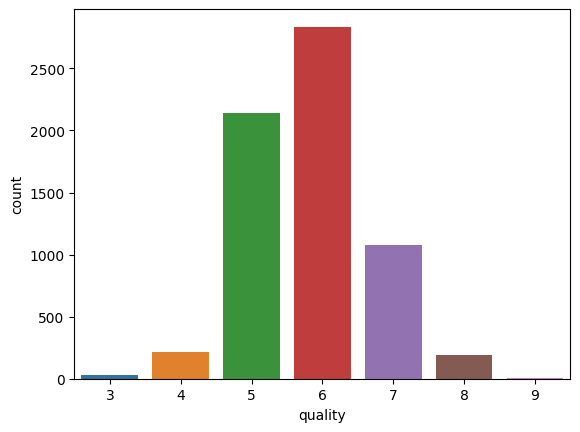

In [ ]:
#count plot of quality variable:
sns.countplot(x='quality', data=df)
plt.show()

IndexError: ignored

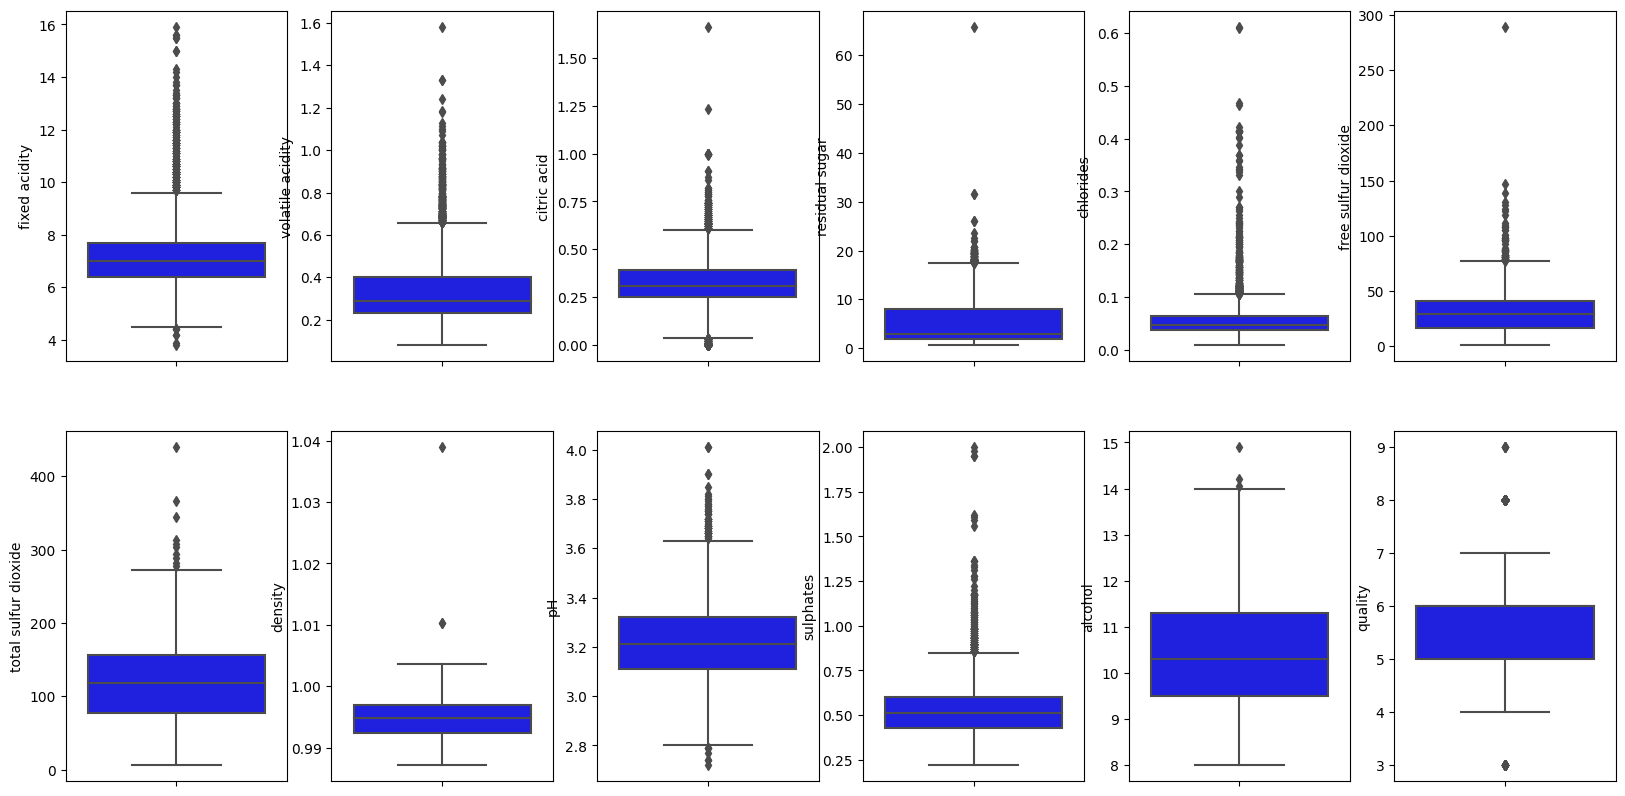

In [ ]:
#Checking outliers in our dataset:
#create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.boxplot(y=col, data=df, color='b', ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
def mod_outlier(df):
  df1 = df.copy()
  df = df._get_numeric_data()
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr)
  upper_bound = q3 +(1.5 * iqr)
  for col in df.columns:
    for i in range(0,len(df[col])):
      if df[col][i] < lower_bound[col]:
        df[col][i] = lower_bound[col]
      if df[col][i] > upper_bound[col]:
        df[col][i] = upper_bound[col]
  for col in df.columns:
    df1[col] = df[col]
  return(df1)
df = mod_outlier(df)

IndexError: ignored

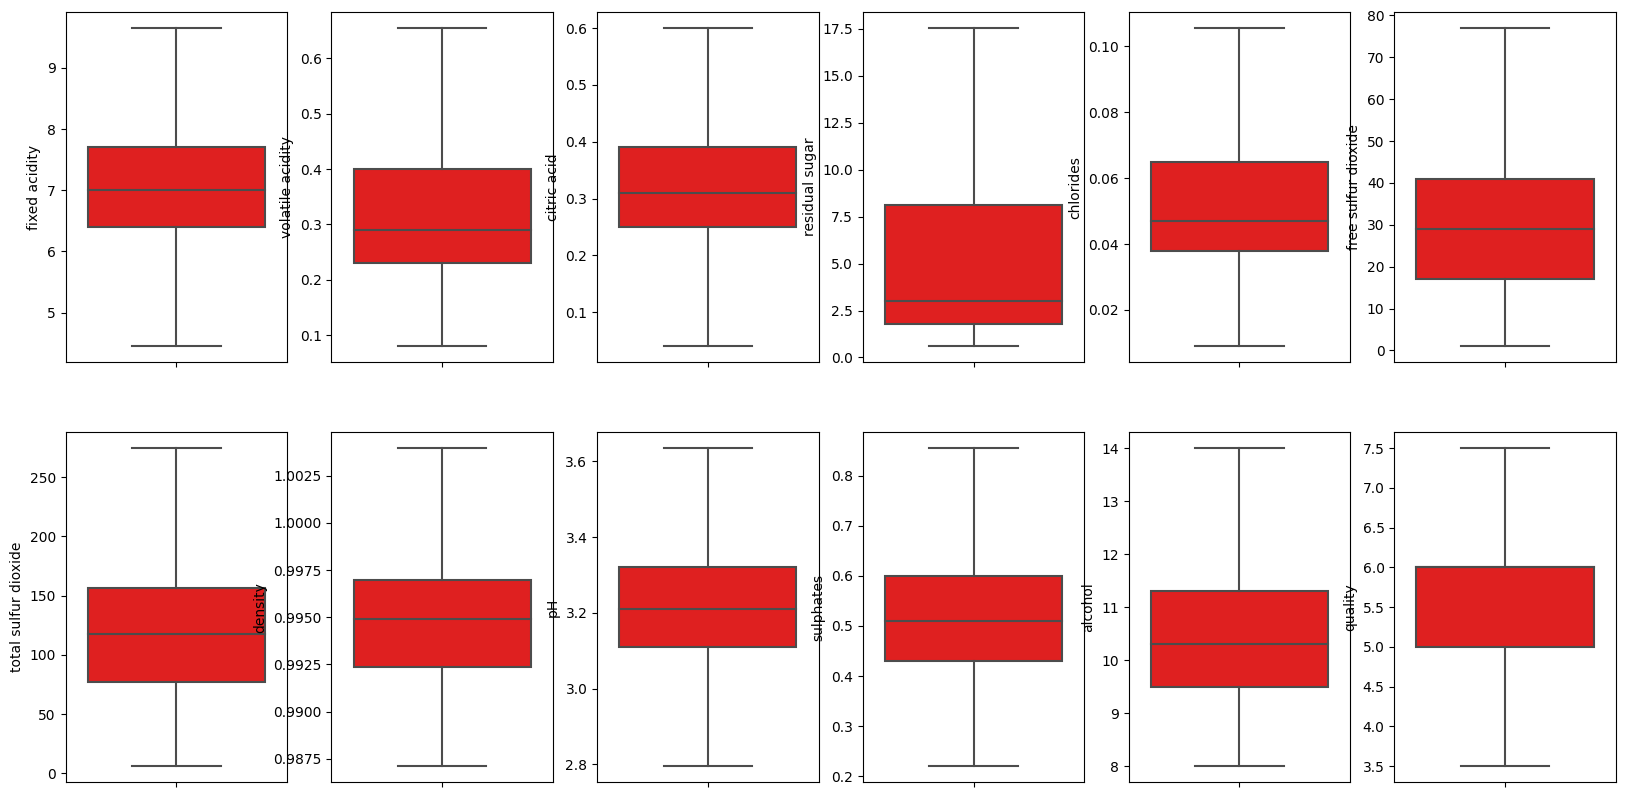

In [ ]:
#lets see whether our data has outliers or not:
#create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.boxplot(y=col, data=df, color='r', ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

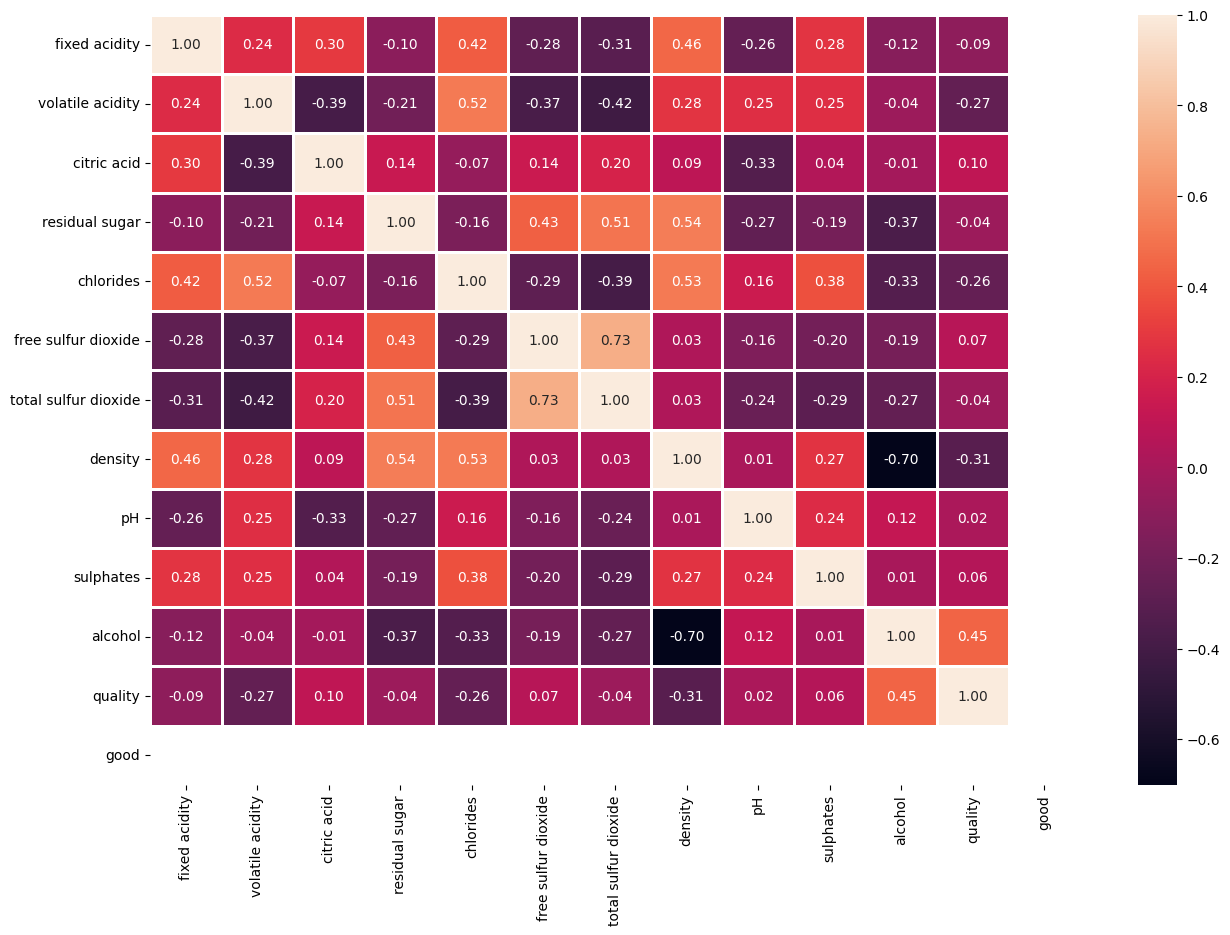

In [ ]:
#Finding Correlation among Columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

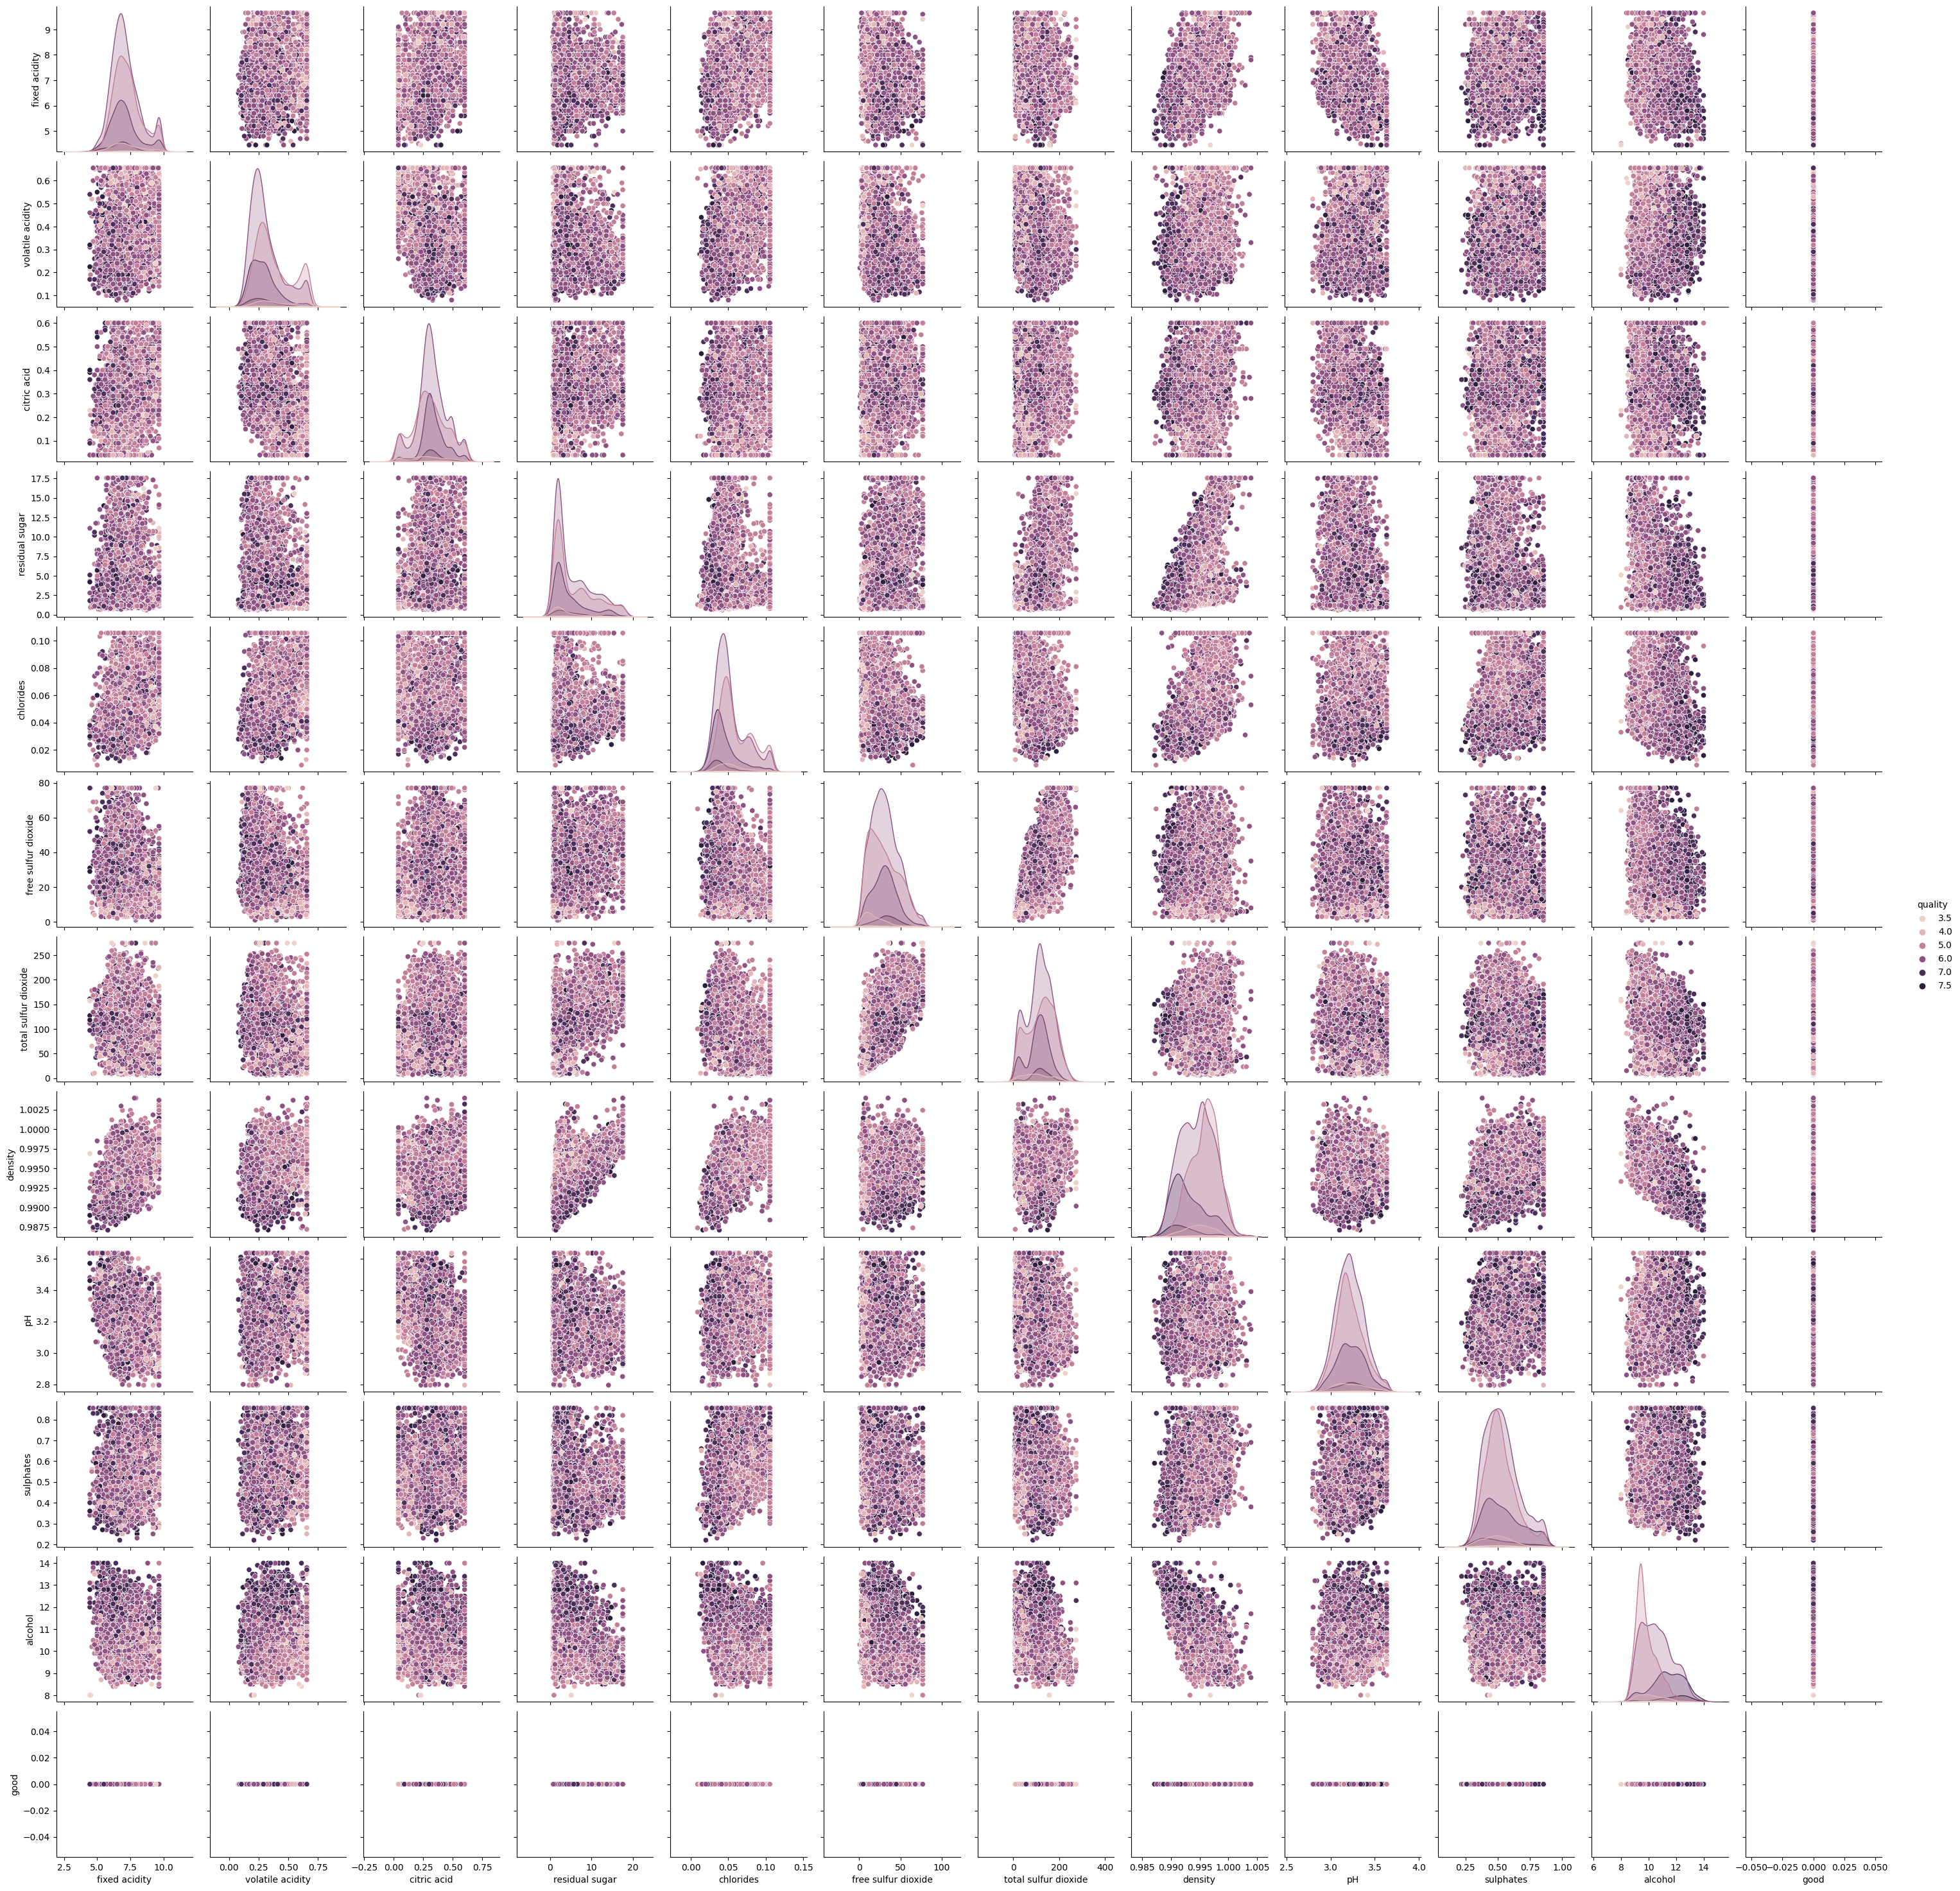

In [ ]:
#Pairplot of all variables with impact on target variable
sns.pairplot(df, diag_kind='kde', hue='quality')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Categorising wine quality
X = df.drop(['quality'], axis = 1)
y = df['quality']

# Convert wine quality values to classes (e.g., low, medium, high)
def categorize_quality(value):
    if value <= 5:
        return 'low'
    elif value <= 7:
        return 'medium'
    else:
        return 'high'

y = y.apply(categorize_quality)

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'X_train' and 'X_test' are DataFrames
categorical_columns = ['color']

# Use LabelEncoder to convert categorical features to numerical format
label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and fit the SVC model
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Predict using the trained model
predicted_svc = svc.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, predicted_svc))

# Accuracy Score
print(accuracy_score(y_test, predicted_svc))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.66      0.67      0.66       451
      medium       0.78      0.80      0.79       812

    accuracy                           0.73      1300
   macro avg       0.48      0.49      0.48      1300
weighted avg       0.71      0.73      0.72      1300

0.7346153846153847


In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
model_params = { 'SVM': {
                 'model': SVC(gamma='auto'),
                 'params' : {
                 'C': [0.9,1.1],
                 'kernel':['linear', 'rbf'],
                 'gamma' :[0.9,1.1]}}}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

dfg = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfg

model  best_score                                   best_params
0   SVM    0.716958  {'C': 1.1, 'gamma': 0.9, 'kernel': 'linear'}

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.1, gamma =  0.9, kernel= 'linear')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.63      0.58      0.60       451
      medium       0.74      0.81      0.78       812

    accuracy                           0.71      1300
   macro avg       0.46      0.46      0.46      1300
weighted avg       0.68      0.71      0.69      1300



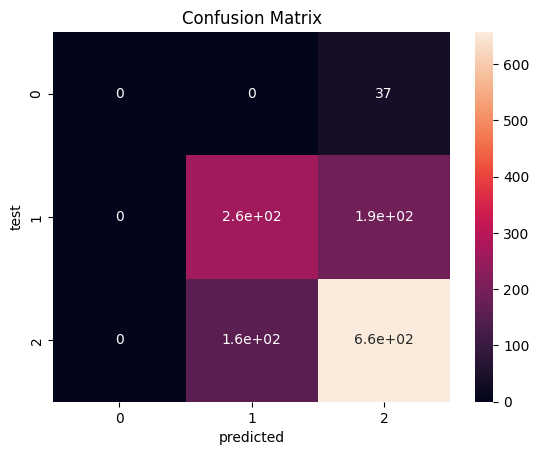

In [ ]:
cm_lor=confusion_matrix(y_test, pred_svc2)
sns.heatmap(cm_lor, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

In [ ]:
import pickle

classifier_path = "/content/drive/MyDrive/Churn_Modelling using ANN/Classifier.pkl"

with open(classifier_path, 'wb') as file:
    pickle.dump(classifier, file)